In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">Ch 01. 딥러닝/머신러닝 입문 - 회귀분석</font><b>

# 1. 기존의 프로그램 방식
- 회귀분석(linear regression) 설명 사이트 :
https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느 정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)
- https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-maermse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
 - https://www.mql5.com/ko/articles/11200

In [16]:
# 섭씨온도(input data = 독립변수)를 화씨온도(target data = 종속변수)를 출력하는 프로그램
def celsius_to_fahrenheit(c):
    return c * 1.8 + 32

In [17]:
input_c = int(input('섭씨 온도는?'))
print('화씨 온도는 ', celsius_to_fahrenheit(input_c))

섭씨 온도는?1
화씨 온도는  33.8


# 2. 딥러닝/머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋
- 3. 모델 구성
- 4. 모델 학습 과정 설계
- 5. 모델 학습시키기(훈련, 검증데이터셋)
- 6. 모델 평가하기(시험데이터셋)
- 7. 모델 저장/사용하기(입력값 주고 예측값 받기)

## 2.1. 노이즈가 없는 데이터로 실습

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 

[]

In [19]:
# 1. 데이터 확보(생성)
data_C = np.arange(100)
data_C # input데이터 (독립변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [20]:
data_F = celsius_to_fahrenheit(data_C)
data_F

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [21]:
# 2. 데이터 전처리 : 스케일 조정(컴퓨터에게 학습시키기 위해 정규화/표준화: 전체 편차를 비슷하게)
scaled_data_C = data_C/100
scaled_data_F = data_F/100
print('독립변수 : ', scaled_data_C)
print('타겟변수 : ', scaled_data_F)

독립변수 :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수 :  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1

In [22]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델 객체 생성 클래스
from tensorflow.keras.layers import Input, Dense # 입력값과 출력값으로 layer층 지정
model = Sequential()
model.add(Input(shape=(1,))) # 입력(독립) 변수의 shape
model.add(Dense(1)) # 타겟(종속, 출력) 변수의 개수
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 4. 모델 학습 과정 설정
model.compile(loss='mse', #손실함수
              optimizer='rmsprop', #옵티마이저
              metrics=['mae']) #평가지표

In [24]:
# 학습 전 예측
model.predict(np.array([[0],[0.01]]))

1/1 [==============================] - 0s 39ms/step


array([[ 0.        ],
       [-0.00655938]], dtype=float32)

In [25]:
# 학습 전 모델 저장
model.save('model/before_learning.h5')

In [26]:
# 5. 모델 학습시키기 - 셀 1번만 실행
hist = model.fit(scaled_data_C, #독립변수(훈련data)
                 scaled_data_F, #타겟변수(훈련data)
                 epochs=1000, #학습 회수
                 verbose=2) #학습 시 출력 여부

Epoch 1/1000
4/4 - 0s - loss: 2.8464 - mae: 1.5312 - 281ms/epoch - 70ms/step
Epoch 2/1000
4/4 - 0s - loss: 2.8081 - mae: 1.5198 - 12ms/epoch - 3ms/step
Epoch 3/1000
4/4 - 0s - loss: 2.7820 - mae: 1.5120 - 6ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 2.7579 - mae: 1.5047 - 0s/epoch - 0s/step
Epoch 5/1000
4/4 - 0s - loss: 2.7362 - mae: 1.4979 - 0s/epoch - 0s/step
Epoch 6/1000
4/4 - 0s - loss: 2.7168 - mae: 1.4919 - 4ms/epoch - 889us/step
Epoch 7/1000
4/4 - 0s - loss: 2.6971 - mae: 1.4859 - 0s/epoch - 0s/step
Epoch 8/1000
4/4 - 0s - loss: 2.6759 - mae: 1.4794 - 14ms/epoch - 4ms/step
Epoch 9/1000
4/4 - 0s - loss: 2.6558 - mae: 1.4731 - 2ms/epoch - 432us/step
Epoch 10/1000
4/4 - 0s - loss: 2.6388 - mae: 1.4678 - 0s/epoch - 0s/step
Epoch 11/1000
4/4 - 0s - loss: 2.6190 - mae: 1.4615 - 16ms/epoch - 4ms/step
Epoch 12/1000
4/4 - 0s - loss: 2.6004 - mae: 1.4558 - 0s/epoch - 0s/step
Epoch 13/1000
4/4 - 0s - loss: 2.5808 - mae: 1.4496 - 12ms/epoch - 3ms/step
Epoch 14/1000
4/4 - 0s - loss: 2.

Epoch 111/1000
4/4 - 0s - loss: 1.1197 - mae: 0.8905 - 5ms/epoch - 1ms/step
Epoch 112/1000
4/4 - 0s - loss: 1.1069 - mae: 0.8846 - 0s/epoch - 0s/step
Epoch 113/1000
4/4 - 0s - loss: 1.0973 - mae: 0.8802 - 12ms/epoch - 3ms/step
Epoch 114/1000
4/4 - 0s - loss: 1.0863 - mae: 0.8750 - 3ms/epoch - 650us/step
Epoch 115/1000
4/4 - 0s - loss: 1.0760 - mae: 0.8704 - 0s/epoch - 0s/step
Epoch 116/1000
4/4 - 0s - loss: 1.0647 - mae: 0.8652 - 14ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 1.0520 - mae: 0.8592 - 0s/epoch - 0s/step
Epoch 118/1000
4/4 - 0s - loss: 1.0411 - mae: 0.8541 - 0s/epoch - 0s/step
Epoch 119/1000
4/4 - 0s - loss: 1.0303 - mae: 0.8489 - 16ms/epoch - 4ms/step
Epoch 120/1000
4/4 - 0s - loss: 1.0215 - mae: 0.8451 - 0s/epoch - 0s/step
Epoch 121/1000
4/4 - 0s - loss: 1.0110 - mae: 0.8400 - 0s/epoch - 0s/step
Epoch 122/1000
4/4 - 0s - loss: 0.9998 - mae: 0.8347 - 16ms/epoch - 4ms/step
Epoch 123/1000
4/4 - 0s - loss: 0.9888 - mae: 0.8293 - 0s/epoch - 0s/step
Epoch 124/1000
4/4 -

Epoch 220/1000
4/4 - 0s - loss: 0.2910 - mae: 0.4493 - 12ms/epoch - 3ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.2863 - mae: 0.4461 - 1ms/epoch - 283us/step
Epoch 222/1000
4/4 - 0s - loss: 0.2818 - mae: 0.4432 - 0s/epoch - 0s/step
Epoch 223/1000
4/4 - 0s - loss: 0.2798 - mae: 0.4417 - 15ms/epoch - 4ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.2769 - mae: 0.4399 - 0s/epoch - 0s/step
Epoch 225/1000
4/4 - 0s - loss: 0.2728 - mae: 0.4369 - 0s/epoch - 0s/step
Epoch 226/1000
4/4 - 0s - loss: 0.2693 - mae: 0.4346 - 17ms/epoch - 4ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.2669 - mae: 0.4329 - 0s/epoch - 0s/step
Epoch 228/1000
4/4 - 0s - loss: 0.2632 - mae: 0.4303 - 0s/epoch - 0s/step
Epoch 229/1000
4/4 - 0s - loss: 0.2601 - mae: 0.4281 - 17ms/epoch - 4ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.2574 - mae: 0.4262 - 0s/epoch - 0s/step
Epoch 231/1000
4/4 - 0s - loss: 0.2545 - mae: 0.4241 - 0s/epoch - 0s/step
Epoch 232/1000
4/4 - 0s - loss: 0.2509 - mae: 0.4215 - 3ms/epoch - 786us/step
Epoch 233/1000
4/4

Epoch 329/1000
4/4 - 0s - loss: 0.1277 - mae: 0.3091 - 14ms/epoch - 4ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.1271 - mae: 0.3082 - 1ms/epoch - 251us/step
Epoch 331/1000
4/4 - 0s - loss: 0.1264 - mae: 0.3074 - 0s/epoch - 0s/step
Epoch 332/1000
4/4 - 0s - loss: 0.1260 - mae: 0.3069 - 16ms/epoch - 4ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.1252 - mae: 0.3060 - 0s/epoch - 0s/step
Epoch 334/1000
4/4 - 0s - loss: 0.1246 - mae: 0.3053 - 0s/epoch - 0s/step
Epoch 335/1000
4/4 - 0s - loss: 0.1239 - mae: 0.3044 - 17ms/epoch - 4ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.1233 - mae: 0.3038 - 0s/epoch - 0s/step
Epoch 337/1000
4/4 - 0s - loss: 0.1226 - mae: 0.3028 - 13ms/epoch - 3ms/step
Epoch 338/1000
4/4 - 0s - loss: 0.1218 - mae: 0.3018 - 1ms/epoch - 281us/step
Epoch 339/1000
4/4 - 0s - loss: 0.1212 - mae: 0.3010 - 0s/epoch - 0s/step
Epoch 340/1000
4/4 - 0s - loss: 0.1205 - mae: 0.3001 - 15ms/epoch - 4ms/step
Epoch 341/1000
4/4 - 0s - loss: 0.1199 - mae: 0.2992 - 0s/epoch - 0s/step
Epoch 342/1000


Epoch 438/1000
4/4 - 0s - loss: 0.0644 - mae: 0.2190 - 15ms/epoch - 4ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.0639 - mae: 0.2182 - 1ms/epoch - 301us/step
Epoch 440/1000
4/4 - 0s - loss: 0.0634 - mae: 0.2175 - 10ms/epoch - 3ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.0630 - mae: 0.2168 - 0s/epoch - 0s/step
Epoch 442/1000
4/4 - 0s - loss: 0.0626 - mae: 0.2158 - 0s/epoch - 0s/step
Epoch 443/1000
4/4 - 0s - loss: 0.0621 - mae: 0.2151 - 18ms/epoch - 4ms/step
Epoch 444/1000
4/4 - 0s - loss: 0.0616 - mae: 0.2142 - 0s/epoch - 0s/step
Epoch 445/1000
4/4 - 0s - loss: 0.0612 - mae: 0.2134 - 15ms/epoch - 4ms/step
Epoch 446/1000
4/4 - 0s - loss: 0.0608 - mae: 0.2127 - 0s/epoch - 0s/step
Epoch 447/1000
4/4 - 0s - loss: 0.0602 - mae: 0.2118 - 0s/epoch - 0s/step
Epoch 448/1000
4/4 - 0s - loss: 0.0597 - mae: 0.2110 - 5ms/epoch - 1ms/step
Epoch 449/1000
4/4 - 0s - loss: 0.0593 - mae: 0.2102 - 335us/epoch - 84us/step
Epoch 450/1000
4/4 - 0s - loss: 0.0588 - mae: 0.2093 - 10ms/epoch - 2ms/step
Epoch 451/10

Epoch 546/1000
4/4 - 0s - loss: 0.0232 - mae: 0.1313 - 0s/epoch - 0s/step
Epoch 547/1000
4/4 - 0s - loss: 0.0229 - mae: 0.1306 - 0s/epoch - 0s/step
Epoch 548/1000
4/4 - 0s - loss: 0.0227 - mae: 0.1299 - 17ms/epoch - 4ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.0224 - mae: 0.1292 - 0s/epoch - 0s/step
Epoch 550/1000
4/4 - 0s - loss: 0.0221 - mae: 0.1284 - 0s/epoch - 0s/step
Epoch 551/1000
4/4 - 0s - loss: 0.0219 - mae: 0.1276 - 17ms/epoch - 4ms/step
Epoch 552/1000
4/4 - 0s - loss: 0.0217 - mae: 0.1270 - 0s/epoch - 0s/step
Epoch 553/1000
4/4 - 0s - loss: 0.0214 - mae: 0.1263 - 0s/epoch - 0s/step
Epoch 554/1000
4/4 - 0s - loss: 0.0212 - mae: 0.1256 - 2ms/epoch - 385us/step
Epoch 555/1000
4/4 - 0s - loss: 0.0210 - mae: 0.1248 - 0s/epoch - 0s/step
Epoch 556/1000
4/4 - 0s - loss: 0.0207 - mae: 0.1241 - 16ms/epoch - 4ms/step
Epoch 557/1000
4/4 - 0s - loss: 0.0205 - mae: 0.1234 - 4ms/epoch - 1000us/step
Epoch 558/1000
4/4 - 0s - loss: 0.0202 - mae: 0.1225 - 0s/epoch - 0s/step
Epoch 559/1000
4/4 -

Epoch 655/1000
4/4 - 0s - loss: 0.0025 - mae: 0.0426 - 0s/epoch - 0s/step
Epoch 656/1000
4/4 - 0s - loss: 0.0024 - mae: 0.0420 - 0s/epoch - 0s/step
Epoch 657/1000
4/4 - 0s - loss: 0.0023 - mae: 0.0412 - 18ms/epoch - 4ms/step
Epoch 658/1000
4/4 - 0s - loss: 0.0022 - mae: 0.0404 - 3ms/epoch - 829us/step
Epoch 659/1000
4/4 - 0s - loss: 0.0021 - mae: 0.0396 - 0s/epoch - 0s/step
Epoch 660/1000
4/4 - 0s - loss: 0.0020 - mae: 0.0389 - 14ms/epoch - 3ms/step
Epoch 661/1000
4/4 - 0s - loss: 0.0019 - mae: 0.0380 - 2ms/epoch - 591us/step
Epoch 662/1000
4/4 - 0s - loss: 0.0018 - mae: 0.0370 - 10ms/epoch - 2ms/step
Epoch 663/1000
4/4 - 0s - loss: 0.0018 - mae: 0.0363 - 4ms/epoch - 998us/step
Epoch 664/1000
4/4 - 0s - loss: 0.0017 - mae: 0.0355 - 0s/epoch - 0s/step
Epoch 665/1000
4/4 - 0s - loss: 0.0016 - mae: 0.0348 - 14ms/epoch - 4ms/step
Epoch 666/1000
4/4 - 0s - loss: 0.0016 - mae: 0.0341 - 0s/epoch - 0s/step
Epoch 667/1000
4/4 - 0s - loss: 0.0015 - mae: 0.0334 - 11ms/epoch - 3ms/step
Epoch 668/1

Epoch 757/1000
4/4 - 0s - loss: 4.1576e-07 - mae: 6.0974e-04 - 11ms/epoch - 3ms/step
Epoch 758/1000
4/4 - 0s - loss: 1.3750e-06 - mae: 0.0011 - 3ms/epoch - 826us/step
Epoch 759/1000
4/4 - 0s - loss: 3.1689e-07 - mae: 5.4667e-04 - 0s/epoch - 0s/step
Epoch 760/1000
4/4 - 0s - loss: 1.1650e-07 - mae: 3.3177e-04 - 4ms/epoch - 1ms/step
Epoch 761/1000
4/4 - 0s - loss: 6.2775e-07 - mae: 7.4914e-04 - 0s/epoch - 0s/step
Epoch 762/1000
4/4 - 0s - loss: 6.9129e-07 - mae: 8.1676e-04 - 11ms/epoch - 3ms/step
Epoch 763/1000
4/4 - 0s - loss: 7.5693e-07 - mae: 8.5151e-04 - 4ms/epoch - 999us/step
Epoch 764/1000
4/4 - 0s - loss: 4.9100e-07 - mae: 6.8654e-04 - 0s/epoch - 0s/step
Epoch 765/1000
4/4 - 0s - loss: 3.8550e-07 - mae: 6.0810e-04 - 10ms/epoch - 2ms/step
Epoch 766/1000
4/4 - 0s - loss: 5.4453e-07 - mae: 7.1790e-04 - 0s/epoch - 0s/step
Epoch 767/1000
4/4 - 0s - loss: 5.8317e-07 - mae: 7.4962e-04 - 16ms/epoch - 4ms/step
Epoch 768/1000
4/4 - 0s - loss: 1.2151e-06 - mae: 0.0010 - 4ms/epoch - 1ms/step


Epoch 856/1000
4/4 - 0s - loss: 8.6027e-08 - mae: 2.8569e-04 - 0s/epoch - 0s/step
Epoch 857/1000
4/4 - 0s - loss: 8.9679e-08 - mae: 2.8697e-04 - 0s/epoch - 0s/step
Epoch 858/1000
4/4 - 0s - loss: 9.6257e-07 - mae: 9.4059e-04 - 18ms/epoch - 4ms/step
Epoch 859/1000
4/4 - 0s - loss: 1.2376e-06 - mae: 0.0010 - 3ms/epoch - 828us/step
Epoch 860/1000
4/4 - 0s - loss: 3.4777e-08 - mae: 1.7356e-04 - 0s/epoch - 0s/step
Epoch 861/1000
4/4 - 0s - loss: 3.3877e-08 - mae: 1.7351e-04 - 4ms/epoch - 1000us/step
Epoch 862/1000
4/4 - 0s - loss: 7.7905e-07 - mae: 8.1990e-04 - 0s/epoch - 0s/step
Epoch 863/1000
4/4 - 0s - loss: 1.4086e-06 - mae: 0.0011 - 13ms/epoch - 3ms/step
Epoch 864/1000
4/4 - 0s - loss: 5.4689e-08 - mae: 2.1468e-04 - 3ms/epoch - 826us/step
Epoch 865/1000
4/4 - 0s - loss: 1.0372e-07 - mae: 3.0206e-04 - 0s/epoch - 0s/step
Epoch 866/1000
4/4 - 0s - loss: 8.5977e-07 - mae: 8.8613e-04 - 4ms/epoch - 999us/step
Epoch 867/1000
4/4 - 0s - loss: 1.3110e-06 - mae: 0.0011 - 0s/epoch - 0s/step
Epoch

Epoch 955/1000
4/4 - 0s - loss: 5.2754e-08 - mae: 2.1722e-04 - 3ms/epoch - 840us/step
Epoch 956/1000
4/4 - 0s - loss: 1.0933e-06 - mae: 9.9694e-04 - 0s/epoch - 0s/step
Epoch 957/1000
4/4 - 0s - loss: 9.3341e-07 - mae: 9.1822e-04 - 13ms/epoch - 3ms/step
Epoch 958/1000
4/4 - 0s - loss: 1.3236e-07 - mae: 3.5380e-04 - 1ms/epoch - 346us/step
Epoch 959/1000
4/4 - 0s - loss: 2.8701e-07 - mae: 5.1112e-04 - 0s/epoch - 0s/step
Epoch 960/1000
4/4 - 0s - loss: 9.9426e-07 - mae: 9.7385e-04 - 3ms/epoch - 781us/step
Epoch 961/1000
4/4 - 0s - loss: 8.7154e-07 - mae: 8.8037e-04 - 0s/epoch - 0s/step
Epoch 962/1000
4/4 - 0s - loss: 7.0089e-08 - mae: 2.5586e-04 - 0s/epoch - 0s/step
Epoch 963/1000
4/4 - 0s - loss: 2.7617e-07 - mae: 4.9616e-04 - 3ms/epoch - 751us/step
Epoch 964/1000
4/4 - 0s - loss: 1.4977e-06 - mae: 0.0012 - 0s/epoch - 0s/step
Epoch 965/1000
4/4 - 0s - loss: 1.1663e-07 - mae: 3.3310e-04 - 0s/epoch - 0s/step
Epoch 966/1000
4/4 - 0s - loss: 1.8046e-07 - mae: 4.0947e-04 - 4ms/epoch - 999us/st

In [27]:
# 6. 모델 평가(모델 학습 과정 시각화)
hist.history.keys() #.history : 딕셔너리

dict_keys(['loss', 'mae'])

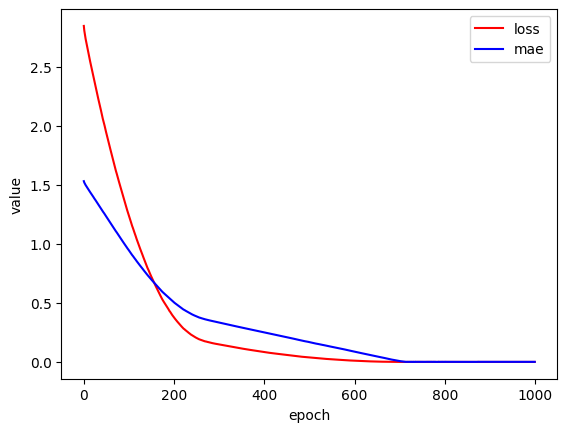

In [31]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.show()

In [35]:
# 7. 모델 저장/사용
model.predict(np.array([[0],[0.01],[0.02]]))

1/1 [==============================] - 0s 24ms/step


array([[0.3193611 ],
       [0.33736274],
       [0.35536435]], dtype=float32)

In [36]:
model.save('model/after_learning.h5') #tensorflow 2.10

In [40]:
y_hat = model.predict([scaled_data_C]) #2차원배열
for h, y in zip(y_hat[::20], scaled_data_F[::20]):
    print(h, y)

4/4 [==============================] - 0s 1ms/step
[0.3193611] 0.32
[0.6793938] 0.68
[1.0394266] 1.04
[1.3994594] 1.4
[1.759492] 1.76


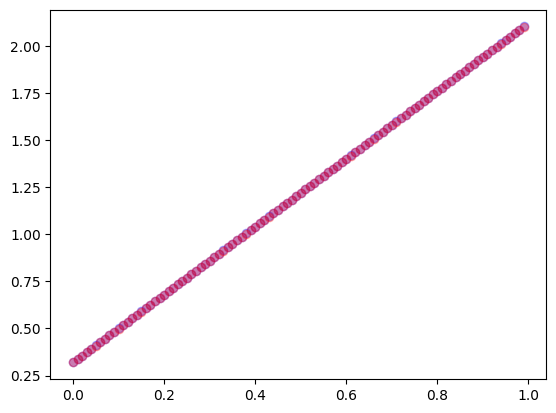

In [43]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=.3)
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=.3)
plt.show()

## 2.2. 노이즈가 있는 데이터로 실습

In [66]:
# 평균 0 표준편차 0.1인 데이터 100개 배열
np.random.seed(707)
noise = np.random.normal(0, scale=0.1, size=100)
noised_scaled_data_F = scaled_data_F + noise
print('독립변수: ', scaled_data_C[:10])
print('타깃변수: ', noised_scaled_data_F[:10])

독립변수:  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
타깃변수:  [0.27500034 0.20410134 0.39498826 0.27117424 0.26897164 0.35314388
 0.4496784  0.42612159 0.49409646 0.45740286]


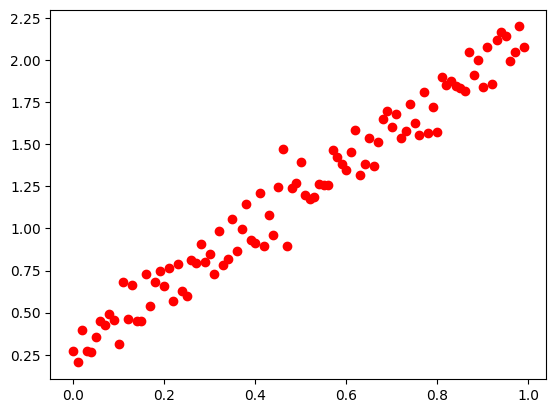

In [65]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F, c='r')
plt.show()

In [89]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
# model2.add(Input(shape=(1,))) # 입력(독립) 변수의 shape
# model2.add(Dense(1)) # 타겟(종속, 출력) 변수의 개수
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# 5. 학습시키기
hist = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 0.2449 - mae: 0.4703 - 201ms/epoch - 50ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.2341 - mae: 0.4593 - 10ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.2262 - mae: 0.4510 - 1ms/epoch - 284us/step
Epoch 4/1000
4/4 - 0s - loss: 0.2196 - mae: 0.4439 - 0s/epoch - 0s/step
Epoch 5/1000
4/4 - 0s - loss: 0.2139 - mae: 0.4378 - 16ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.2082 - mae: 0.4315 - 3ms/epoch - 820us/step
Epoch 7/1000
4/4 - 0s - loss: 0.2025 - mae: 0.4252 - 8ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.1974 - mae: 0.4195 - 4ms/epoch - 1ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.1920 - mae: 0.4132 - 13ms/epoch - 3ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.1873 - mae: 0.4076 - 2ms/epoch - 604us/step
Epoch 11/1000
4/4 - 0s - loss: 0.1823 - mae: 0.4018 - 10ms/epoch - 3ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.1775 - mae: 0.3961 - 2ms/epoch - 569us/step
Epoch 13/1000
4/4 - 0s - loss: 0.1727 - mae: 0.3903 - 10ms/epoch - 3ms/step
Epoch 14/1000
4/4 - 

Epoch 110/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888 - 3ms/epoch - 736us/step
Epoch 111/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0885 - 0s/epoch - 0s/step
Epoch 112/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0886 - 13ms/epoch - 3ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0886 - 1ms/epoch - 360us/step
Epoch 114/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0886 - 0s/epoch - 0s/step
Epoch 115/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0886 - 5ms/epoch - 1ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888 - 0s/epoch - 0s/step
Epoch 117/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0885 - 0s/epoch - 0s/step
Epoch 118/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0887 - 3ms/epoch - 728us/step
Epoch 119/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0887 - 0s/epoch - 0s/step
Epoch 120/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0884 - 14ms/epoch - 3ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0885 - 4ms/epoch - 922us/step
Epoch 122/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0885 - 0s/epoch - 0s/step
Epoch 123/1000

Epoch 218/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 13ms/epoch - 3ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 463us/step
Epoch 220/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 866us/step
Epoch 221/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 222/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 14ms/epoch - 4ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 956us/epoch - 239us/step
Epoch 224/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 225/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 227/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 13ms/epoch - 3ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 689us/step
Epoch 229/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 230/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 13ms/epoch - 3ms/step
Epoch 

4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 15ms/epoch - 4ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 328/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 329/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 331/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 12ms/epoch - 3ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 1ms/epoch - 274us/step
Epoch 333/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 334/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 16ms/epoch - 4ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 336/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 337/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 338/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 339/1000
4/4 - 0s - loss: 0.01

Epoch 435/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 11ms/epoch - 3ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 438/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 8ms/epoch - 2ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 724us/epoch - 181us/step
Epoch 440/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 441/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 15ms/epoch - 4ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 443/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 444/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 16ms/epoch - 4ms/step
Epoch 445/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 446/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 447/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 17ms/epoch - 4ms/step
Epoch 448/10

Epoch 543/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 544/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1000us/step
Epoch 545/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 943us/epoch - 236us/step
Epoch 546/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 10ms/epoch - 2ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 979us/step
Epoch 548/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 549/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 13ms/epoch - 3ms/step
Epoch 550/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 952us/step
Epoch 551/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 552/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1000us/step
Epoch 553/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 481us/epoch - 120us/step
Epoch 554/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 10ms/epoch - 3ms/step
Epoch 555/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/st

Epoch 651/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 1ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 328us/epoch - 82us/step
Epoch 653/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 654/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 1ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 656/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 13ms/epoch - 3ms/step
Epoch 657/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 3ms/epoch - 643us/step
Epoch 658/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 659/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 1000us/step
Epoch 660/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 661/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 11ms/epoch - 3ms/step
Epoch 662/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 824us/step
Epoch 663/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 664/

Epoch 759/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 760/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 16ms/epoch - 4ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 762/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 763/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 17ms/epoch - 4ms/step
Epoch 764/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 765/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 766/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 1ms/epoch - 260us/step
Epoch 767/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 768/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 16ms/epoch - 4ms/step
Epoch 769/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 770/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 771/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 17ms/epoch - 4ms/step
Epoch 772/1000
4/4 - 0

Epoch 868/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 869/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 870/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 17ms/epoch - 4ms/step
Epoch 871/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 0s/epoch - 0s/step
Epoch 872/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 0s/epoch - 0s/step
Epoch 873/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 17ms/epoch - 4ms/step
Epoch 874/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 875/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 876/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0878 - 6ms/epoch - 1ms/step
Epoch 877/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 878/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 879/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 0s/epoch - 0s/step
Epoch 880/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 17ms/epoch - 4ms/step
Epoch 881/1000
4/4 - 0s - l

Epoch 978/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 979/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 980/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 981/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 17ms/epoch - 4ms/step
Epoch 982/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 983/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 984/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 17ms/epoch - 4ms/step
Epoch 985/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 986/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 987/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 1ms/epoch - 260us/step
Epoch 988/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 989/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 16ms/epoch - 4ms/step
Epoch 990/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 991/1000
4/4 - 0s -

In [91]:
# 6. 학습 과정 살펴보기
hist.history

{'loss': [0.24491846561431885,
  0.23412753641605377,
  0.22622761130332947,
  0.21956002712249756,
  0.21392039954662323,
  0.20822586119174957,
  0.20254188776016235,
  0.19740654528141022,
  0.19200214743614197,
  0.18727260828018188,
  0.18226325511932373,
  0.17751577496528625,
  0.1727161407470703,
  0.1682835817337036,
  0.16366030275821686,
  0.15915408730506897,
  0.15450330078601837,
  0.1500122845172882,
  0.14557088911533356,
  0.14122924208641052,
  0.1370163857936859,
  0.1330404132604599,
  0.12948554754257202,
  0.12546133995056152,
  0.12159204483032227,
  0.11781950294971466,
  0.11373677849769592,
  0.11012943089008331,
  0.10674019902944565,
  0.10328219085931778,
  0.0998450219631195,
  0.0963330864906311,
  0.09281830489635468,
  0.08995120227336884,
  0.08686742931604385,
  0.08381149917840958,
  0.08063305169343948,
  0.0774814635515213,
  0.07482979446649551,
  0.07183119654655457,
  0.06899968534708023,
  0.06618307530879974,
  0.06365082412958145,
  0.0611998

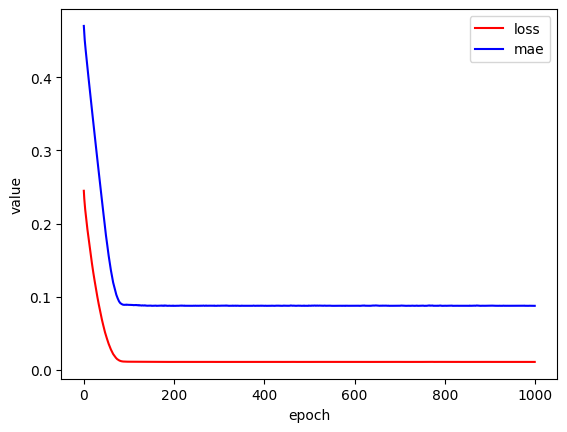

In [92]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.show()

In [93]:
# 7. 모델 사용/저장하기
model2.predict(np.array([[-0.01],[0],[0.01],[0.02]]))

1/1 [==============================] - 0s 28ms/step


array([[0.26161548],
       [0.28025877],
       [0.29890206],
       [0.31754538]], dtype=float32)

In [94]:
y_hat = model2.predict([scaled_data_C])
for h, y in zip(y_hat[::20], noised_scaled_data_F[::20]):
    print(h, y)

4/4 [==============================] - 0s 1ms/step
[0.28025877] 0.2750003435726217
[0.6531248] 0.6573517921634632
[1.0259907] 0.9109195630083544
[1.3988569] 1.3455450551349164
[1.7717228] 1.5738145874658984


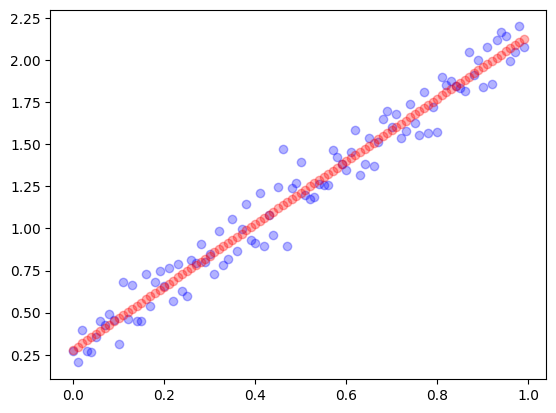

In [95]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F, c='b', alpha=.3)
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=.3)
plt.show()

In [96]:
# 모델 저장
model2.save('model/noised_after_learning.h5')
# from tensorflow.keras.models import save_model
# save_model(model2, 'model/noised_after_learning1.h5')
# save_model(model2, 'model/noised_after_learning1.keras')

In [97]:
# 저장된 모델 사용하기
from tensorflow.keras.models import load_model
model3 = load_model('model/noised_after_learning.h5')

In [98]:
model3.predict(np.array([[-0.01],[0],[0.01],[0.02]])) #model2와 동일

1/1 [==============================] - 0s 33ms/step


array([[0.26161548],
       [0.28025877],
       [0.29890206],
       [0.31754538]], dtype=float32)